# 2. Data Pre-Processing & Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# For visualizations
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import plotly.express as px

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../Data/data_clean.csv', encoding = "ISO-8859-1")

In [4]:
df.head(3)

,DaysBeingCustomer,Recency,Age,Income,Education,Marital_Status,Kids,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,TotalProductsL2Y,TotalPurchasesL2Y,AvgProductsPerTrip,SharePurchasesOnDeal
0,1000,58,57,58138.0,Graduate,Single,0,635,88,546,...,88,3,4,10,8,7,1617,22,73.5,13.6
1,154,38,60,46344.0,Graduate,Single,2,11,1,6,...,6,2,2,1,1,5,27,4,6.8,50.0
2,501,26,49,71613.0,Graduate,Together,0,426,49,127,...,42,1,10,2,8,4,776,20,38.8,5.0


### I. Data Pre-Processing

As we have 2 categorical columns in our dataset (`Education` & `Marital_Status`) we need to transform them into ordinal to carry out our models later. I will do so with the method of One Hot Encoder to avoid making the algorithm think there is a specific hierarchy in those variables. 

#### 1. Education

In [5]:
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [6]:
labels = ["Ed_" + str(i) for i in list(df['Education'].unique())]

In [7]:
onehotencoder = preprocessing.OneHotEncoder()

In [8]:
education = onehotencoder.fit_transform(df['Education'].values.reshape(-1,1)).toarray()

In [9]:
education

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
df[labels] = pd.DataFrame(education, index = df.index)

In [11]:
df.sample(3)

,DaysBeingCustomer,Recency,Age,Income,Education,Marital_Status,Kids,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,TotalProductsL2Y,TotalPurchasesL2Y,AvgProductsPerTrip,SharePurchasesOnDeal,Ed_Graduate,Ed_Postgraduate,Ed_Undergraduate
1301,555,61,48,60894.0,Graduate,Together,1,606,7,155,...,3,10,7,832,21,39.6,23.8,1.0,0.0,0.0
1206,390,96,57,42213.0,Graduate,Together,1,309,3,24,...,1,5,7,363,13,27.9,15.4,1.0,0.0,0.0
1099,435,66,44,53187.0,Graduate,Together,1,211,2,30,...,1,4,5,267,11,24.3,18.2,1.0,0.0,0.0


#### 2. Marital Status

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [13]:
labels = ["MS_" + str(i) for i in list(df['Marital_Status'].unique())]

In [14]:
marital_status = onehotencoder.fit_transform(df['Marital_Status'].values.reshape(-1,1)).toarray()

In [15]:
df[labels] = pd.DataFrame(marital_status, index = df.index)

In [16]:
df.sample(2)

,DaysBeingCustomer,Recency,Age,Income,Education,Marital_Status,Kids,MntWines,MntFruits,MntMeatProducts,...,AvgProductsPerTrip,SharePurchasesOnDeal,Ed_Graduate,Ed_Postgraduate,Ed_Undergraduate,MS_Single,MS_Together,MS_Married,MS_Divorced,MS_Widow
830,693,10,34,25130.0,Undergraduate,Together,1,2,5,7,...,10.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1925,566,29,49,62694.0,Postgraduate,Married,2,379,6,157,...,39.4,26.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
df.drop(columns = ['Education', 'Marital_Status'], inplace = True)

In [18]:
df.sample()

,DaysBeingCustomer,Recency,Age,Income,Kids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AvgProductsPerTrip,SharePurchasesOnDeal,Ed_Graduate,Ed_Postgraduate,Ed_Undergraduate,MS_Single,MS_Together,MS_Married,MS_Divorced,MS_Widow
1228,124,15,36,41986.0,1,27,5,8,8,3,...,9.0,42.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
df.dtypes

DaysBeingCustomer         int64
Recency                   int64
Age                       int64
Income                  float64
Kids                      int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumStorePurchases         int64
NumCatalogPurchases       int64
NumWebPurchases           int64
NumWebVisitsMonth         int64
TotalProductsL2Y          int64
TotalPurchasesL2Y         int64
AvgProductsPerTrip      float64
SharePurchasesOnDeal    float64
Ed_Graduate             float64
Ed_Postgraduate         float64
Ed_Undergraduate        float64
MS_Single               float64
MS_Together             float64
MS_Married              float64
MS_Divorced             float64
MS_Widow                float64
dtype: object

### II. Dimensionality Reduction - PCA

#### 1. Standardization

Firstly, we need to standardize our data:

In [20]:
df_ = df.copy()

In [21]:
df_.sample()

,DaysBeingCustomer,Recency,Age,Income,Kids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AvgProductsPerTrip,SharePurchasesOnDeal,Ed_Graduate,Ed_Postgraduate,Ed_Undergraduate,MS_Single,MS_Together,MS_Married,MS_Divorced,MS_Widow
960,447,84,39,40233.0,1,80,4,46,0,17,...,18.6,62.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_), columns=df_.columns)
df_scaler.head()

,DaysBeingCustomer,Recency,Age,Income,Kids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AvgProductsPerTrip,SharePurchasesOnDeal,Ed_Graduate,Ed_Postgraduate,Ed_Undergraduate,MS_Single,MS_Together,MS_Married,MS_Divorced,MS_Widow
0,1.976261,0.307416,1.017036,0.235065,-1.265354,0.983248,1.554197,1.679753,2.461071,1.475428,...,0.774679,-0.610237,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,1.900081,-0.591123,-0.188851
1,-1.667186,-0.383316,1.273609,-0.236212,1.395042,-0.870921,-0.636379,-0.713323,-0.650425,-0.631481,...,-0.681808,1.501600,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,1.900081,-0.591123,-0.188851
2,-0.172770,-0.797755,0.332841,0.773512,-1.265354,0.362220,0.572215,-0.177096,1.344593,-0.147134,...,0.016956,-1.109188,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,-0.526293,1.691695,-0.188851
3,-1.925587,-0.797755,-1.292121,-1.023324,0.064844,-0.870921,-0.560842,-0.651280,-0.504001,-0.583047,...,-0.638135,0.532708,0.992870,-0.786840,-0.35878,-0.339429,-0.793560,-0.526293,1.691695,-0.188851
4,-0.823078,1.550734,-1.035548,0.241258,0.064844,-0.389550,0.421141,-0.216981,0.154904,-0.001830,...,-0.173020,0.671950,-1.007181,1.270907,-0.35878,-0.339429,1.260144,-0.526293,-0.591123,-0.188851


#### 2. Identifying the optimal dimensions for PCA

Then, let's identify how many dimensions do we need to do the dimensionality reduction (PCA).

Text(0, 0.5, 'Cumulative Explained Variance')

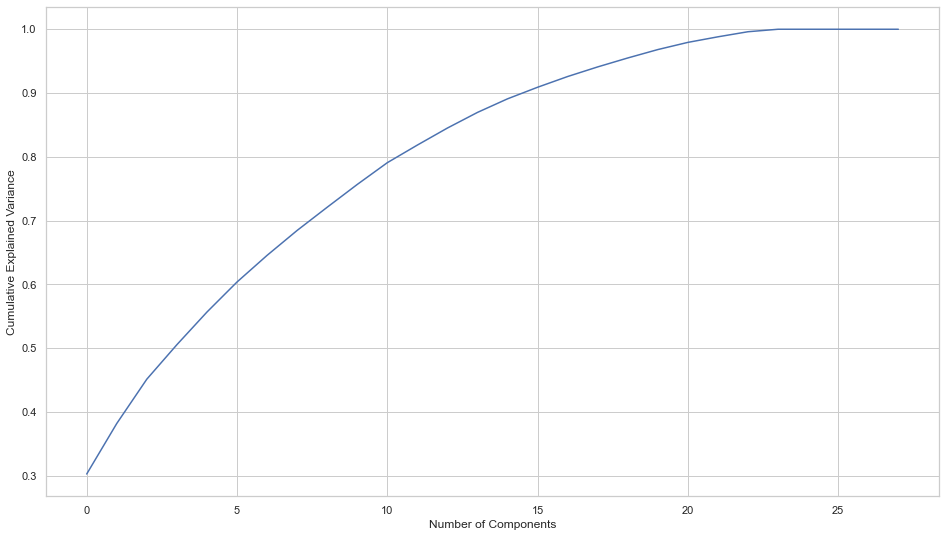

In [23]:
pca = PCA().fit(df_scaler)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

This graph shows me how much of the total, 22-dimensional variance is contained within the first components. For example, the first 10 components contain almost 80% of my variance. This allows me to identify the best number for my dimensions in the PCA, I will use 10 firstly and then will see if I have to reduce even more the number.